In [75]:
def find_class(label):
  letter_dict = {0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G', 7:'H', 8:'I', 9:'K', 10:'L', 11:'M', 12:'N', 13:'O', 14:'P', 15:'Q', 16:'R', 17:'S', 18:'T', 19:'U', 20:'V', 21:'W', 22:'X', 23:'Y'}
  max_val = max(label)

  for index, elem in enumerate(label):
    if elem == max_val:
      return letter_dict[index]


In [76]:
# Connect google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras

# Paths
image_path = 'drive/Shareddrives/Machine Learning/Example Photos/'

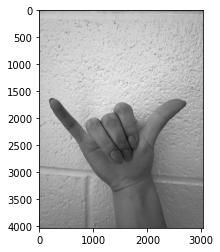

In [89]:
# Load image
image = cv2.imread(image_path + 'y.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image, cmap="gray")

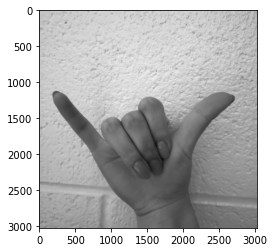

In [90]:
dimensions = image.shape
height, width = dimensions

# Crop image
crop1 = 0
crop2 = 0
if height > width:
  crop1 = (height - width) / 2
  crop2 = height - crop1
  image = image[int(crop1):int(crop2), 0:width]
elif width > height:
  crop1 = (width - height) / 2
  crop2 = width - crop1
  image = image[0:height, int(crop1):int(crop2)]

plt.imshow(image, cmap="gray")

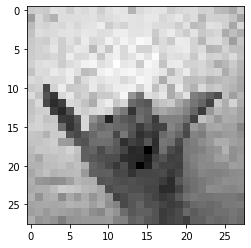

In [91]:
# Resize and reshape image
image = cv2.resize(image, (28, 28))

plt.imshow(image, cmap="gray")
image = image.reshape(1, 28, 28, 1)

In [92]:
# Load model
model = keras.models.load_model('drive/Shareddrives/Machine Learning/Models/95_model')
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [93]:
# Make prediction
y_pred = model.predict(image)
print(find_class(y_pred[0]))

Y
